In [1]:
using Printf
using LinearAlgebra
######################################################################################################
### We just look at all N^2 planes and make sure that there are points on either side of the plane.
### WC: O(N^3)..  pecial cases:
###     * We need to get rid of duplicates.  Use GCD
###     * If any two points are antipodes, we are done
###     * If we have a set of points that are all coplanar with the origin and all other points are on one side,
###         * we need to check if the points are all within the same semicircle
### Originally, I wrote this to just tackle the small, but it is fast enough to pass the whole thing.
######################################################################################################

function reducePoints(points::Array{Int64,2},N::Int64)::Vector{Vector{Int64}}
    uniquePoints = Set{Vector{Int64}}()
    for i in 1:N
        factor = gcd(gcd(points[i,1],points[i,2]),points[i,3])
        a::Vector{Int64} = [points[i,1] ÷ factor, points[i,2] ÷ factor, points[i,3] ÷ factor]
        if a in uniquePoints; continue; end
        push!(uniquePoints,a)
    end
    return collect(uniquePoints)
end

function main(infn="")
    infile = (infn != "") ? open(infn,"r") : length(ARGS) > 0 ? open(ARGS[1],"r") : stdin
    tt = parse(Int64,readline(infile))
    for qq in 1:tt
        print("Case #$qq: ")
        N = parse(Int64,rstrip(readline(infile)))
        points=fill(0,N,3)
        for i in 1:N
            points[i,:] = [parse(Int64,x) for x in split(rstrip(readline(infile)))]
        end
        points2 = reducePoints(points,N)
        N2 = length(points2)
        omni = true
        omnitrue = false
        skipSet = Set{Tuple{Int64,Int64}}()
        for i::Int64 in 1:N2-1
            for j::Int64 in i+1:N2
                if (i,j) ∈ skipSet; continue; end
                coplanar::Vector{Int64} = [i,j]
                avec::Vector{Int64} = cross(vec(points2[i]),vec(points2[j]))
                if avec[1] == avec[2] == avec[3] == 0; omnitrue=true; break; end ## Antipodes, since we have already removed the same point numbers
                posfound::Bool = false
                negfound::Bool = false
                for k in 1:N2
                    if k == i || k == j; continue; end
                    x = dot(points2[k],avec)
                    if     x > 0; posfound=true;
                    elseif x < 0; negfound=true;
                    else   push!(coplanar,k)
                    end
                    if posfound && negfound; break; end
                end
                if posfound && negfound || (length(coplanar) > 2 && checkCoplanar(points2,coplanar,avec)) 
                    if length(coplanar) > 2 
                        for ii in coplanar
                            for jj in coplanar
                                if ii == jj; continue; end
                                push!(skipSet,(min(ii,jj),max(ii,jj)))
                            end
                        end
                    end
                else
                    omni=false
                    break
                end
            end
            if omnitrue || !omni; break; end
        end
        ans = omni ? "YES" : "NO"
        print("$ans\n")
    end
end

function checkCoplanar(points2::Vector{Vector{Int64}},coplanar::Vector{Int64},avec::Vector{Int64})::Bool
    ## We could do this in n log n, but there isn't a huge incentive,
    ## since we will be taking out more work than that out of the outer
    ## loop with the skipsets
    for i in coplanar
        bvec::Vector{Int64} = cross(vec(avec),vec(points2[i]))
        posfound::Bool = false
        negfound::Bool = false
        for j in coplanar
            if i==j; continue; end
            x::Int64 = dot(bvec,points2[j])
            if x == 0; return true;  ## antipodal
            elseif x > 0; posfound = true
            else   x < 0; negfound = true
            end
            if posfound && negfound; break; end
        end
        if !posfound || !negfound; return false; end
    end
    return true
end

checkCoplanar (generic function with 1 method)

In [3]:
using Profile, ProfileSVG, ProfileVega

Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #5: NO
Case #6: YES
Case #7: YES
Case #8: NO
Case #9: NO
Case #10: YES
Case #11: YES
Case #12: NO
Case #13: NO
Case #14: NO
Case #15: NO
Case #16: NO
Case #17: NO
Case #18: NO
Case #26: NO
Case #27: YES
Case #28: NO
Case #29: YES
Case #30: NO
Case #31: YES
Case #32: NO
Case #33: NO
Case #34: YES
Case #35: NO
Case #36: NO
Case #37: YES
Case #38: NO
Case #39: NO
Case #40: NO
Case #41: NO
Case #42: NO
Case #43: NO
Case #44: NO
Case #45: NO
Case #46: NO
Case #47: NO
Case #48: NO
Case #49: NO
Case #50: NO
Case #51: NO
Case #52: NO
Case #53: NO
Case #54: NO
Case #55: NO
Case #56: NO
Case #57: NO
Case #58: YES
Case #59: YES
Case #60: NO
Case #61: YES
Case #62: YES
Case #63: NO
Case #64: YES
Case #65: NO
Case #66: NO
Case #67: NO
Case #68: NO
Case #69: NO
Case #70: NO
Case #71: YES
Case #72: NO
Case #73: NO
Case #74: YES
Case #75: NO
Case #76: NO
Case #77: NO
Case #78: YES
Case #79: NO
Ca

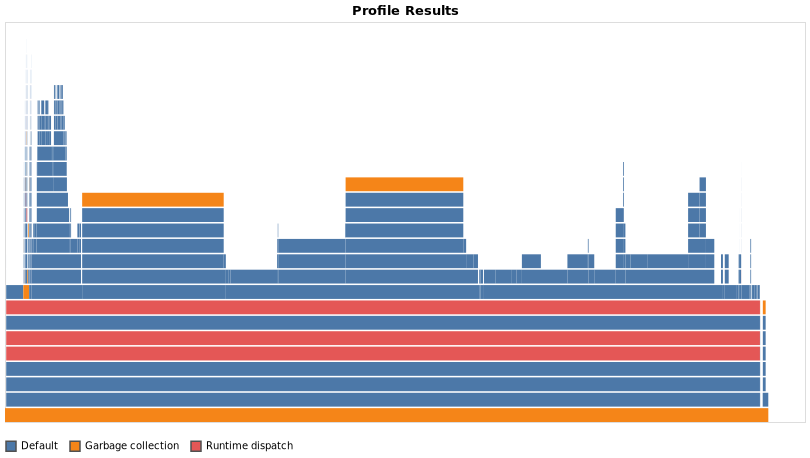

In [4]:
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in")
Profile.clear()
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in4")
ProfileVega.view()

In [5]:
using Printf
using LinearAlgebra
######################################################################################################
### We just look at all N^2 planes and make sure that there are points on either side of the plane.
### WC: O(N^3)..  pecial cases:
###     * We need to get rid of duplicates.  Use GCD
###     * If any two points are antipodes, we are done
###     * If we have a set of points that are all coplanar with the origin and all other points are on one side,
###         * we need to check if the points are all within the same semicircle
### Originally, I wrote this to just tackle the small, but it is fast enough to pass the whole thing.
######################################################################################################

function reducePoints(points::Array{Int64,2},N::Int64)::Vector{Vector{Int64}}
    uniquePoints = Set{Vector{Int64}}()
    for i in 1:N
        factor = gcd(gcd(points[i,1],points[i,2]),points[i,3])
        a::Vector{Int64} = [points[i,1] ÷ factor, points[i,2] ÷ factor, points[i,3] ÷ factor]
        if a in uniquePoints; continue; end
        push!(uniquePoints,a)
    end
    return collect(uniquePoints)
end

function main(infn="")
    infile = (infn != "") ? open(infn,"r") : length(ARGS) > 0 ? open(ARGS[1],"r") : stdin
    tt = parse(Int64,readline(infile))
    for qq in 1:tt
        print("Case #$qq: ")
        N = parse(Int64,rstrip(readline(infile)))
        points=fill(0,N,3)
        for i in 1:N
            points[i,:] = [parse(Int64,x) for x in split(rstrip(readline(infile)))]
        end
        points2 = reducePoints(points,N)
        N2 = length(points2)
        omni = true
        omnitrue = false
        skipSet = Set{Tuple{Int64,Int64}}()
        avec::Vector{Int64} = fill(0,3)
        for i::Int64 in 1:N2-1
            for j::Int64 in i+1:N2
                if (i,j) ∈ skipSet; continue; end
                coplanar::Vector{Int64} = [i,j]
                mycross!(avec,points2[i],points2[j])
                if avec[1] == avec[2] == avec[3] == 0; omnitrue=true; break; end ## Antipodes, since we have already removed the same point numbers
                posfound::Bool = false
                negfound::Bool = false
                for k in 1:N2
                    if k == i || k == j; continue; end
                    x = mydot(points2[k],avec)
                    if     x > 0; posfound=true;
                    elseif x < 0; negfound=true;
                    else   push!(coplanar,k)
                    end
                    if posfound && negfound; break; end
                end
                if posfound && negfound || (length(coplanar) > 2 && checkCoplanar(points2,coplanar,avec)) 
                    if length(coplanar) > 2 
                        for ii in coplanar
                            for jj in coplanar
                                if ii == jj; continue; end
                                push!(skipSet,(min(ii,jj),max(ii,jj)))
                            end
                        end
                    end
                else
                    omni=false
                    break
                end
            end
            if omnitrue || !omni; break; end
        end
        ans = omni ? "YES" : "NO"
        print("$ans\n")
    end
end

function checkCoplanar(points2::Vector{Vector{Int64}},coplanar::Vector{Int64},avec::Vector{Int64})::Bool
    ## We could do this in n log n, but there isn't a huge incentive,
    ## since we will be taking out more work than that out of the outer
    ## loop with the skipsets
    for i in coplanar
        bvec::Vector{Int64} = mycross(avec,points2[i])
        posfound::Bool = false
        negfound::Bool = false
        for j in coplanar
            if i==j; continue; end
            x::Int64 = mydot(bvec,points2[j])
            if x == 0; return true;  ## antipodal
            elseif x > 0; posfound = true
            else   x < 0; negfound = true
            end
            if posfound && negfound; break; end
        end
        if !posfound || !negfound; return false; end
    end
    return true
end

function mydot(a::Vector{Int64},b::Vector{Int64})::Int64
    return a[1]*b[1]+a[2]*b[2]+a[3]*b[3]
end

function mycross!(c::Vector{Int64},a::Vector{Int64},b::Vector{Int64})
    c[1] = a[2]*b[3]-b[2]*a[3]
    c[2] = a[3]*b[1]-b[3]*a[1]
    c[3] = a[1]*b[2]-b[1]*a[2]
    return c
end

function mycross(a::Vector{Int64},b::Vector{Int64})::Vector{Int64}
    c = fill(0,3)
    mycross!(c,a,b)
end

mycross (generic function with 1 method)

Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #5: NO
Case #6: YES
Case #7: YES
Case #8: NO
Case #9: NO
Case #10: YES
Case #11: YES
Case #12: NO
Case #13: NO
Case #14: NO
Case #15: NO
Case #16: NO
Case #17: NO
Case #18: NO
Case #19: NO
Case #20: NO
Case #21: NO
Case #22: NO
Case #23: NO
Case #24: YES
Case #25: NO
Case #26: NO
Case #27: YES
Case #28: NO
Case #29: YES
Case #30: NO
Case #31: YES
Case #32: NO
Case #33: NO
Case #34: YES
Case #35: NO
Case #36: NO
Case #37: YES
Case #38: NO
Case #39: NO
Case #40: NO
Case #41: NO
Case #42: NO
Case #43: NO
Case #44: NO
Case #45: NO
Case #46: NO
Case #47: NO
Case #48: NO
Case #49: NO
Case #50: NO
Case #51: NO
Case #52: NO
Case #53: NO
Case #54: NO
Case #55: NO
Case #56: NO
Case #57: NO
Case #58: YES
Case #59: YES
Case #60: NO
Case #61: YES
Case #62: YES
Case #63: NO
Case #64: YES
Case #65: NO
Case #66: NO
Case #67: NO
Case #68: NO
Case #69: NO
Case #70: NO
Case #71: YES
Case #72: NO
Cas

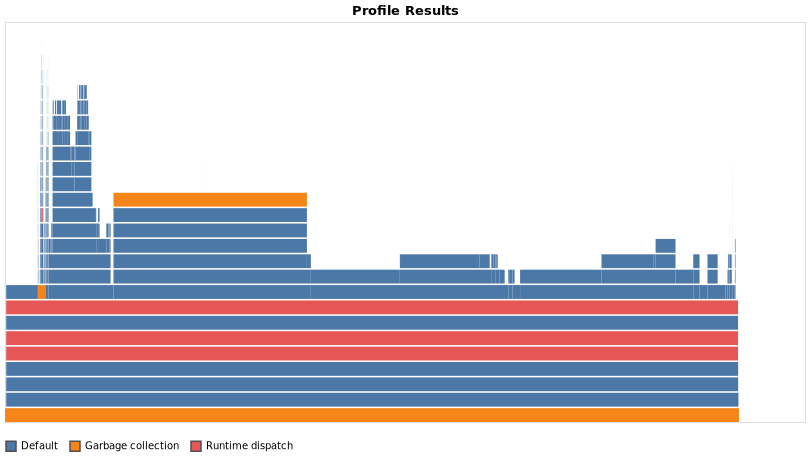

In [6]:
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in")
Profile.clear()
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in4")
ProfileVega.view()

In [7]:
using Printf
using LinearAlgebra
######################################################################################################
### We just look at all N^2 planes and make sure that there are points on either side of the plane.
### WC: O(N^3)..  pecial cases:
###     * We need to get rid of duplicates.  Use GCD
###     * If any two points are antipodes, we are done
###     * If we have a set of points that are all coplanar with the origin and all other points are on one side,
###         * we need to check if the points are all within the same semicircle
### Originally, I wrote this to just tackle the small, but it is fast enough to pass the whole thing.
######################################################################################################
const Pt = Tuple{Int64,Int64,Int64}

function reducePoints(points::Vector{Pt})::Vector{Pt}
    uniquePoints = Set{Pt}()
    for p in points
        factor = gcd(gcd(p[1],p[2]),p[3])
        a::Pt =(p[1] ÷ factor, p[2] ÷ factor, p[3] ÷ factor)
        if a in uniquePoints; continue; end
        push!(uniquePoints,a)
    end
    return collect(uniquePoints)
end

function main(infn="")
    infile = (infn != "") ? open(infn,"r") : length(ARGS) > 0 ? open(ARGS[1],"r") : stdin
    tt = parse(Int64,readline(infile))
    for qq in 1:tt
        print("Case #$qq: ")
        N = parse(Int64,rstrip(readline(infile)))
        points::Vector{Pt}=fill((0,0,0),N)
        for i in 1:N
            points[i] = Tuple([parse(Int64,x) for x in split(rstrip(readline(infile)))])
        end
        points2 = reducePoints(points)
        N2 = length(points2)
        omni = true
        omnitrue = false
        skipSet = fill(false,N2,N2)
        coplanar::Vector{Int64} = Vector{Int64}()
        for i::Int64 in 1:N2-1
            for j::Int64 in i+1:N2
                if skipSet[i,j]; continue; end
                resize!(coplanar,2)
                coplanar[1] = i
                coplanar[2] = j
                avec = mycross(points2[i],points2[j])
                if avec[1] == avec[2] == avec[3] == 0; omnitrue=true; break; end ## Antipodes, since we have already removed the same point numbers
                posfound::Bool = false
                negfound::Bool = false
                for k in 1:N2
                    if k == i || k == j; continue; end
                    x = mydot(points2[k],avec)
                    if     x > 0; posfound=true;
                    elseif x < 0; negfound=true;
                    else   push!(coplanar,k)
                    end
                    if posfound && negfound; break; end
                end
                if posfound && negfound || (length(coplanar) > 2 && checkCoplanar(points2,coplanar,avec)) 
                    if length(coplanar) > 2 
                        for ii in coplanar
                            for jj in coplanar
                                skipSet[ii,jj] = true
                            end
                        end
                    end
                else
                    omni=false
                    break
                end
            end
            if omnitrue || !omni; break; end
        end
        ans = omni ? "YES" : "NO"
        print("$ans\n")
    end
end

#function checkCoplanar(points2::Vector{Vector{Int64}},coplanar::Vector{Int64},avec::Vector{Int64})::Bool
function checkCoplanar(points2::Vector{Pt},coplanar::Vector{Int64},avec::Pt)::Bool

    ## We could do this in n log n, but there isn't a huge incentive,
    ## since we will be taking out more work than that out of the outer
    ## loop with the skipsets
    for i in coplanar
        bvec::Pt = mycross(avec,points2[i])
        posfound::Bool = false
        negfound::Bool = false
        for j in coplanar
            if i==j; continue; end
            x::Int64 = mydot(bvec,points2[j])
            if x == 0; return true;  ## antipodal
            elseif x > 0; posfound = true
            else   x < 0; negfound = true
            end
            if posfound && negfound; break; end
        end
        if !posfound || !negfound; return false; end
    end
    return true
end

function mydot(a::Pt,b::Pt)::Int64
    return a[1]*b[1]+a[2]*b[2]+a[3]*b[3]
end

function mycross(a::Pt,b::Pt)::Pt
    return (a[2]*b[3]-b[2]*a[3], a[3]*b[1]-b[3]*a[1], a[1]*b[2]-b[1]*a[2])
end

mycross (generic function with 2 methods)

Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #5: NO
Case #6: YES
Case #7: YES
Case #8: NO
Case #9: NO
Case #10: YES
Case #11: YES
Case #12: NO
Case #13: NO
Case #14: NO
Case #15: NO
Case #16: NO
Case #17: NO
Case #18: NO
Case #19: NO
Case #20: NO
Case #21: NO
Case #22: NO
Case #23: NO
Case #24: YES
Case #25: NO
Case #26: NO
Case #27: YES
Case #28: NO
Case #29: YES
Case #30: NO
Case #31: YES
Case #32: NO
Case #33: NO
Case #34: YES
Case #35: NO
Case #36: NO
Case #37: YES
Case #38: NO
Case #39: NO
Case #40: NO
Case #41: NO
Case #42: NO
Case #43: NO
Case #44: NO
Case #45: NO
Case #46: NO
Case #47: NO
Case #48: NO
Case #49: NO
Case #50: NO
Case #51: NO
Case #52: NO
Case #53: NO
Case #54: NO
Case #55: NO
Case #56: NO
Case #57: NO
Case #58: YES
Case #59: YES
Case #60: NO
Case #61: YES
Case #62: YES
Case #63: NO
Case #64: YES
Case #65: NO
Case #66: NO
Case #67: NO
Case #68: NO
Case #69: NO
Case #70: NO
Case #71: YES
Case #72: NO
Cas

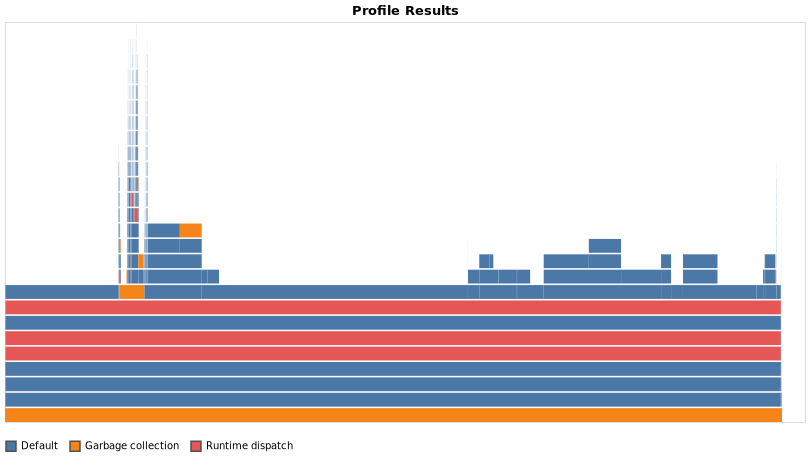

In [8]:
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in")
Profile.clear()
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in4")
ProfileVega.view()

In [9]:
using Printf
using LinearAlgebra
######################################################################################################
### We just look at all N^2 planes and make sure that there are points on either side of the plane.
### WC: O(N^3)..  pecial cases:
###     * We need to get rid of duplicates.  Use GCD
###     * If any two points are antipodes, we are done
###     * If we have a set of points that are all coplanar with the origin and all other points are on one side,
###         * we need to check if the points are all within the same semicircle
### Originally, I wrote this to just tackle the small, but it is fast enough to pass the whole thing.
######################################################################################################
const Pt = Tuple{Int64,Int64,Int64}

function reducePoints(points::Vector{Pt})::Vector{Pt}
    uniquePoints = Set{Pt}()
    for p in points
        factor = gcd(gcd(p[1],p[2]),p[3])
        a::Pt =(p[1] ÷ factor, p[2] ÷ factor, p[3] ÷ factor)
        if a in uniquePoints; continue; end
        push!(uniquePoints,a)
    end
    return collect(uniquePoints)
end

function main(infn="")
    infile = (infn != "") ? open(infn,"r") : length(ARGS) > 0 ? open(ARGS[1],"r") : stdin
    tt = parse(Int64,readline(infile))
    for qq in 1:tt
        print("Case #$qq: ")
        N = parse(Int64,rstrip(readline(infile)))
        points::Vector{Pt}=fill((0,0,0),N)
        for i in 1:N
            points[i] = Tuple([parse(Int64,x) for x in split(rstrip(readline(infile)))])
        end
        points2 = reducePoints(points)
        N2 = length(points2)
        omni = true
        omnitrue = false
        coplanar::Vector{Int64} = Vector{Int64}()
        for i::Int64 in 1:N2-1
            for j::Int64 in i+1:N2
                resize!(coplanar,2)
                coplanar[1] = i
                coplanar[2] = j
                avec = mycross(points2[i],points2[j])
                if avec[1] == avec[2] == avec[3] == 0; omnitrue=true; break; end ## Antipodes, since we have already removed the same point numbers
                posfound::Bool = false
                negfound::Bool = false
                for k in 1:N2
                    if k == i || k == j; continue; end
                    x = mydot(points2[k],avec)
                    if     x > 0; posfound=true;
                    elseif x < 0; negfound=true;
                    else   push!(coplanar,k)
                    end
                    if posfound && negfound; break; end
                end
                if posfound && negfound || (length(coplanar) > 2 && checkCoplanar(points2,coplanar,avec))
                    continue 
                else
                    omni=false
                    break
                end
            end
            if omnitrue || !omni; break; end
        end
        ans = omni ? "YES" : "NO"
        print("$ans\n")
    end
end

#function checkCoplanar(points2::Vector{Vector{Int64}},coplanar::Vector{Int64},avec::Vector{Int64})::Bool
function checkCoplanar(points2::Vector{Pt},coplanar::Vector{Int64},avec::Pt)::Bool

    ## We could do this in n log n, but there isn't a huge incentive,
    ## since we will be taking out more work than that out of the outer
    ## loop with the skipsets
    for i in coplanar
        bvec::Pt = mycross(avec,points2[i])
        posfound::Bool = false
        negfound::Bool = false
        for j in coplanar
            if i==j; continue; end
            x::Int64 = mydot(bvec,points2[j])
            if x == 0; return true;  ## antipodal
            elseif x > 0; posfound = true
            else   x < 0; negfound = true
            end
            if posfound && negfound; break; end
        end
        if !posfound || !negfound; return false; end
    end
    return true
end

function mydot(a::Pt,b::Pt)::Int64
    return a[1]*b[1]+a[2]*b[2]+a[3]*b[3]
end

function mycross(a::Pt,b::Pt)::Pt
    return (a[2]*b[3]-b[2]*a[3], a[3]*b[1]-b[3]*a[1], a[1]*b[2]-b[1]*a[2])
end

mycross (generic function with 2 methods)

Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #1: NO
Case #2: YES
Case #3: YES
Case #4: YES
Case #5: NO
Case #6: YES
Case #7: YES
Case #8: NO
Case #9: NO
Case #10: YES
Case #11: YES
Case #12: NO
Case #13: NO
Case #14: NO
Case #15: NO
Case #16: NO
Case #17: NO
Case #18: NO
Case #19: NO
Case #20: NO
Case #21: NO
Case #22: NO
Case #23: NO
Case #24: YES
Case #25: NO
Case #26: NO
Case #27: YES
Case #28: NO
Case #29: YES
Case #30: NO
Case #31: YES
Case #32: NO
Case #33: NO
Case #34: YES
Case #35: NO
Case #36: NO
Case #37: YES
Case #38: NO
Case #39: NO
Case #40: NO
Case #41: NO
Case #42: NO
Case #43: NO
Case #44: NO
Case #45: NO
Case #46: NO
Case #47: NO
Case #48: NO
Case #49: NO
Case #50: NO
Case #51: NO
Case #52: NO
Case #53: NO
Case #54: NO
Case #55: NO
Case #56: NO
Case #57: NO
Case #58: YES
Case #59: YES
Case #60: NO
Case #61: YES
Case #62: YES
Case #63: NO
Case #64: YES
Case #65: NO
Case #66: NO
Case #67: NO
Case #68: NO
Case #69: NO
Case #70: NO
Case #71: YES
Case #72: NO
Cas

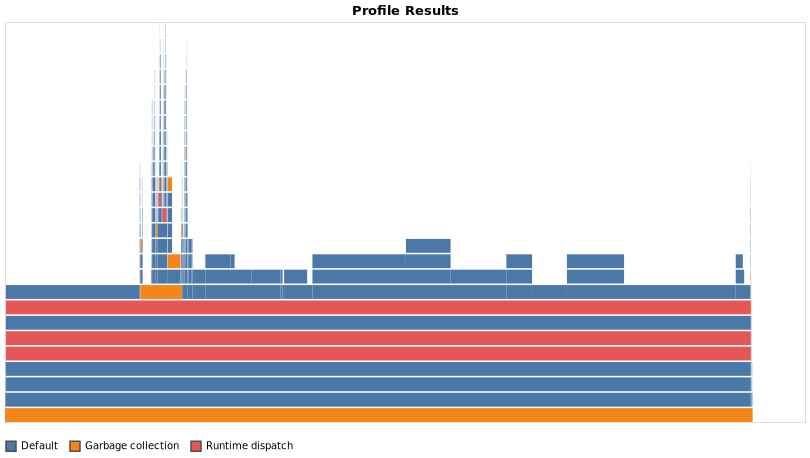

In [10]:
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in")
Profile.clear()
@profile main("/home/debr/codejams/julia/work/2017/WF/D.in4")
ProfileVega.view()